In [327]:
import pandas as pd

In [328]:
# read the dataset
values = []
 
with open("./dataset1.txt","r") as f_read:
    cnt = 0
    for line in f_read:
        cnt += 1
        if cnt < 5:
            words = line.split()
            values.append(words)
        else:
            with open("holed.txt","a+") as f_write:
                print(line, file=f_write) 
                
sites = []
for i in range(1,len(values[1])):
    if (i-1)%3 == 0:
        sites.append(values[1][i])
        
print(sites)

# reading the given text file into csv
hole = pd.read_csv("dataset1.txt", sep="\t\t\t\t", engine="python", names = ['DATE']+sites)

# final form of data that is going tobe used
data = hole[3:]
data.shape

['BACK', 'FCHP', 'FCHU', 'FSIM', 'FSMI', 'GILL', 'LGRR', 'MCMU', 'MSTK', 'NORM', 'POLS', 'RABB', 'THRF', 'VULC', 'WEYB', 'WGRY', 'BLC', 'BRD', 'CBB', 'FCC', 'IQA', 'MEA', 'OTT', 'RES', 'STJ', 'VIC']


(744, 27)

In [329]:
data.head()

,DATE,BACK,FCHP,FCHU,FSIM,FSMI,GILL,LGRR,MCMU,MSTK,...,BLC,BRD,CBB,FCC,IQA,MEA,OTT,RES,STJ,VIC
3,01-01,171.83,139.92,172.54,130.82,136.48,183.82,76.97,95.67,95.67,...,165.17,55.00,137.43,167.81,289.75,62.42,45.28,96.14,41.64,23.06
4,01-02,35.62,54.79,44.68,76.98,58.05,45.52,18.70,30.98,30.98,...,85.28,14.82,96.79,42.31,91.35,19.30,14.56,72.25,11.57,11.06
5,01-03,73.2,64.17,86.49,103.34,82.37,60.49,17.40,48.57,48.57,...,101.62,14.01,125.12,80.80,68.69,35.68,7.95,96.30,8.40,19.98
6,01-04,60.23,36.38,63.84,41.99,32.11,34.09,10.68,20.38,20.38,...,62.62,9.11,46.42,60.66,34.40,14.56,7.29,42.44,5.44,7.18
7,01-05,69.26,36.37,71.51,39.79,39.98,61.74,10.40,14.98,14.98,...,26.19,8.81,33.85,69.94,45.55,13.59,8.52,35.90,9.98,10.38


## Taking Standard Deviation of all the features value for individual instance, because the anomalies can be detected when the values for each features have high variance.

In [330]:
data['std'] = (data.iloc[:,1:].std(axis=1))
data.head()

# adding one column(just the column of zeros as clustering will take atleast of two features)
data['clustering'] = np.zeros((744,1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [363]:
data.head()

,DATE,BACK,FCHP,FCHU,FSIM,FSMI,GILL,LGRR,MCMU,MSTK,...,IQA,MEA,OTT,RES,STJ,VIC,std,clustering,labels,labelsIns
3,01-01,171.83,139.92,172.54,130.82,136.48,183.82,76.97,95.67,95.67,...,289.75,62.42,45.28,96.14,41.64,23.06,74.153828,0.0,0,0
4,01-02,35.62,54.79,44.68,76.98,58.05,45.52,18.70,30.98,30.98,...,91.35,19.30,14.56,72.25,11.57,11.06,59.601310,0.0,1,1
5,01-03,73.2,64.17,86.49,103.34,82.37,60.49,17.40,48.57,48.57,...,68.69,35.68,7.95,96.30,8.40,19.98,75.039061,0.0,0,0
6,01-04,60.23,36.38,63.84,41.99,32.11,34.09,10.68,20.38,20.38,...,34.40,14.56,7.29,42.44,5.44,7.18,70.533832,0.0,0,0
7,01-05,69.26,36.37,71.51,39.79,39.98,61.74,10.40,14.98,14.98,...,45.55,13.59,8.52,35.90,9.98,10.38,55.984924,0.0,1,1


(38.71722062166481, 1322.3626462545492)

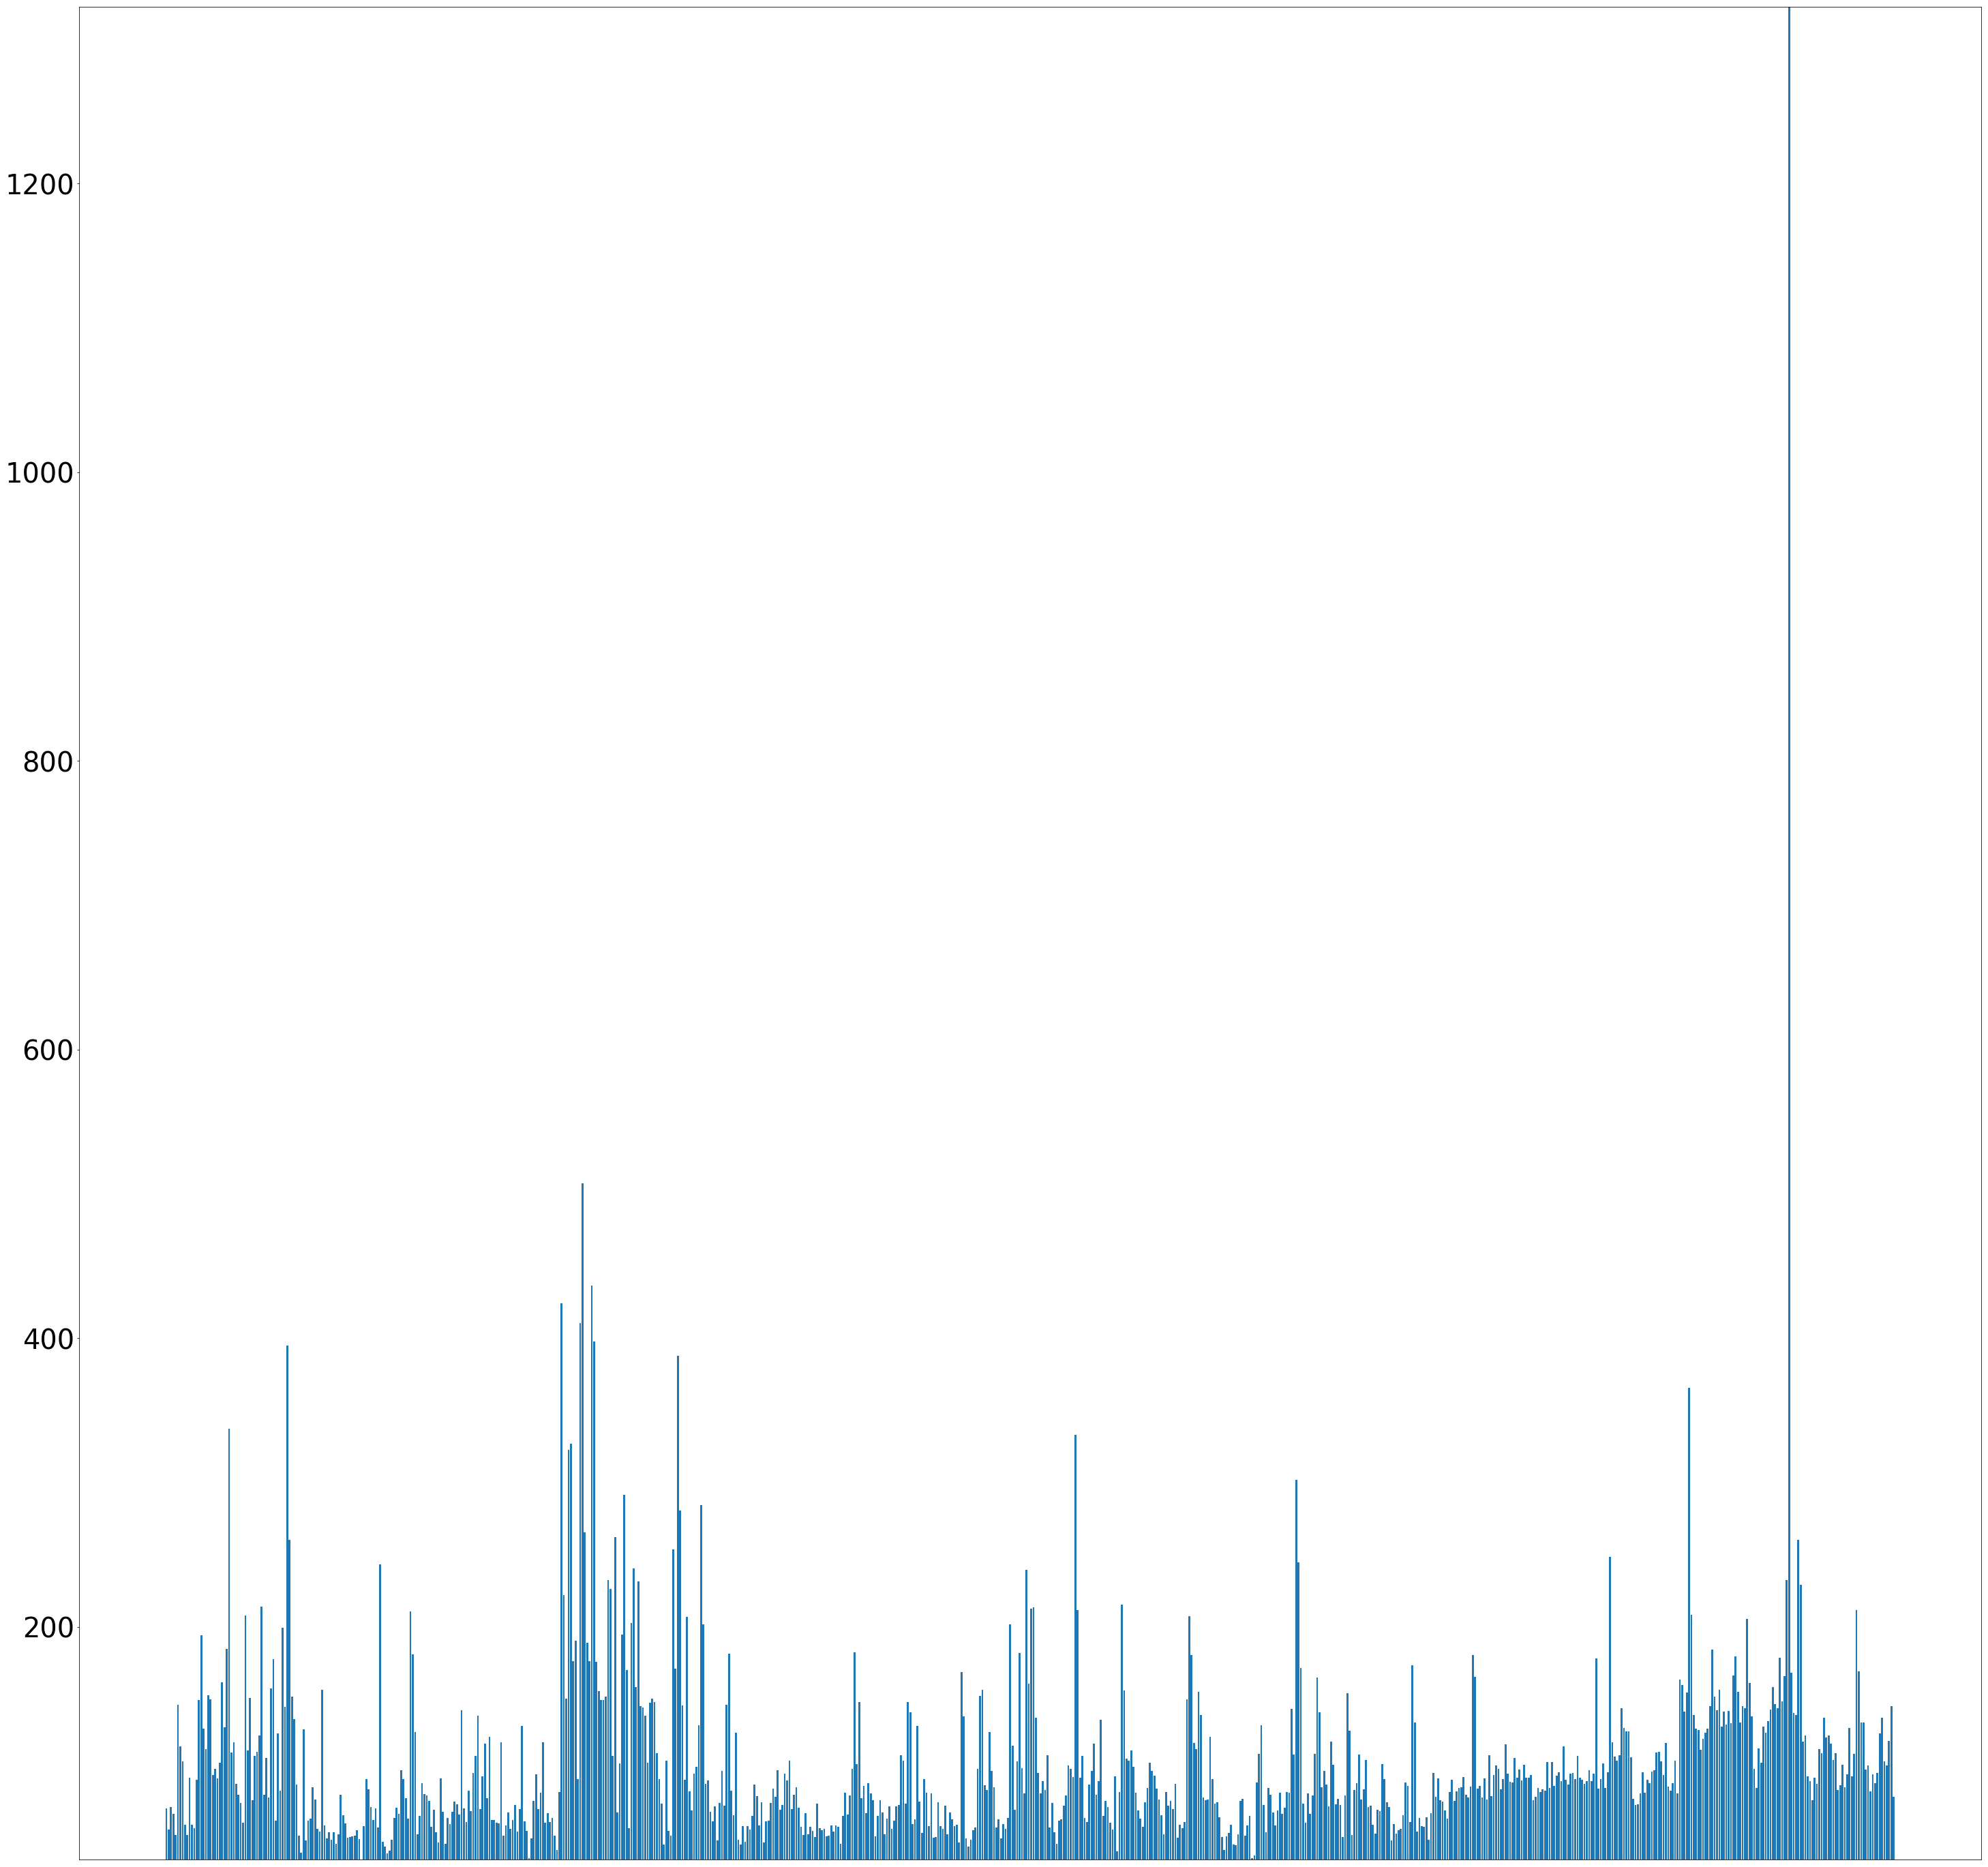

In [338]:
plt.figure(figsize=(50,50))
plt.bar(data.iloc[:,0], data.iloc[:,-2])
plt.xticks([])
plt.yticks(fontsize=40)

plt.ylim(min(data.iloc[:,-2]), max(data.iloc[:,-2]))

## Clustering (Based on Instances)

In [344]:
from sklearn.cluster import DBSCAN

dbscanIns = DBSCAN().fit(data.iloc[:,-2:])
labelsIns = dbscanIns.labels_

# adding a column into dataframe 
array = np.array(labelsIns)
data['labelsIns'] = array


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


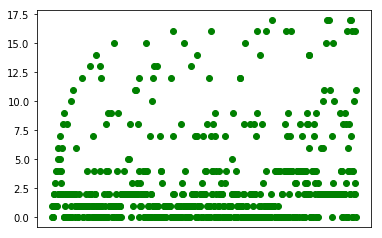

In [355]:
#ax = gdf.plot(figsize=(25,25),markersize=200)
plt.plot(data.iloc[:,0], labelsIns,'go') 
plt.xticks([])
plt.show()# plot x and y using default line style and color

## Clustering (Based on Features)

In [348]:
# transposing the dataframe as we want to more focus on features
data_transpose = data.T
data_transpose.drop(['DATE'],inplace=True)

data_transpose.describe()

,3,4,5,6,7,8,9,10,11,12,...,737,738,739,740,741,742,743,744,745,746
count,30.0,30,30.0,30.0,30.00,30.00,30.0,30.00,30,30.00,...,30.00,30.0,30.00,30.0,30.00,30.00,30.00,30.00,30.00,30.0
unique,27.0,28,27.0,27.0,27.00,28.00,29.0,29.00,28,27.00,...,29.00,26.0,29.00,29.0,29.00,28.00,29.00,29.00,29.00,27.0
top,0.0,1,0.0,0.0,14.98,126.35,120.7,95.05,1,31.67,...,29.61,0.0,32.75,25.4,43.05,18.58,43.86,44.69,64.51,0.0
freq,3.0,2,3.0,3.0,3.00,3.00,2.0,2.00,2,3.00,...,2.00,3.0,2.00,2.0,2.00,2.00,2.00,2.00,2.00,3.0


In [361]:
data_transpose = data.iloc[:,1:-4]
data_transpose.head()
data_transpose.shape

(744, 26)

In [360]:
zeroArr = np.zeros(26)

listRow = []
final_array = []
for index, row in data_transpose.iterrows():
    for element in row:
        listRow.append(element)
        
    rowArray = np.array(listRow)
    print(rowArray.shape)
    combined = np.vstack((rowArray, zeroArr)).T
    dbscan = DBSCAN(eps=3).fit(combined)
    labels = dbscan.labels_
    combinedLabels = np.vstack((rowArray, zeroArr,labels)).T
    print(combinedLabels)
    final_array.append(combinedLabels)
    listRow = []

final_array = np.array(final_array)
few_magField = final_array[2][:,0]
labels = final_array[2][:,2]

(26,)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

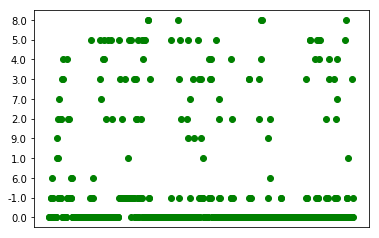

In [351]:
#ax = gdf.plot(figsize=(25,25),markersize=200)
plt.plot(few_magField, labels,'go') 
plt.xticks([])
plt.show()# plot x and y using default line style and color

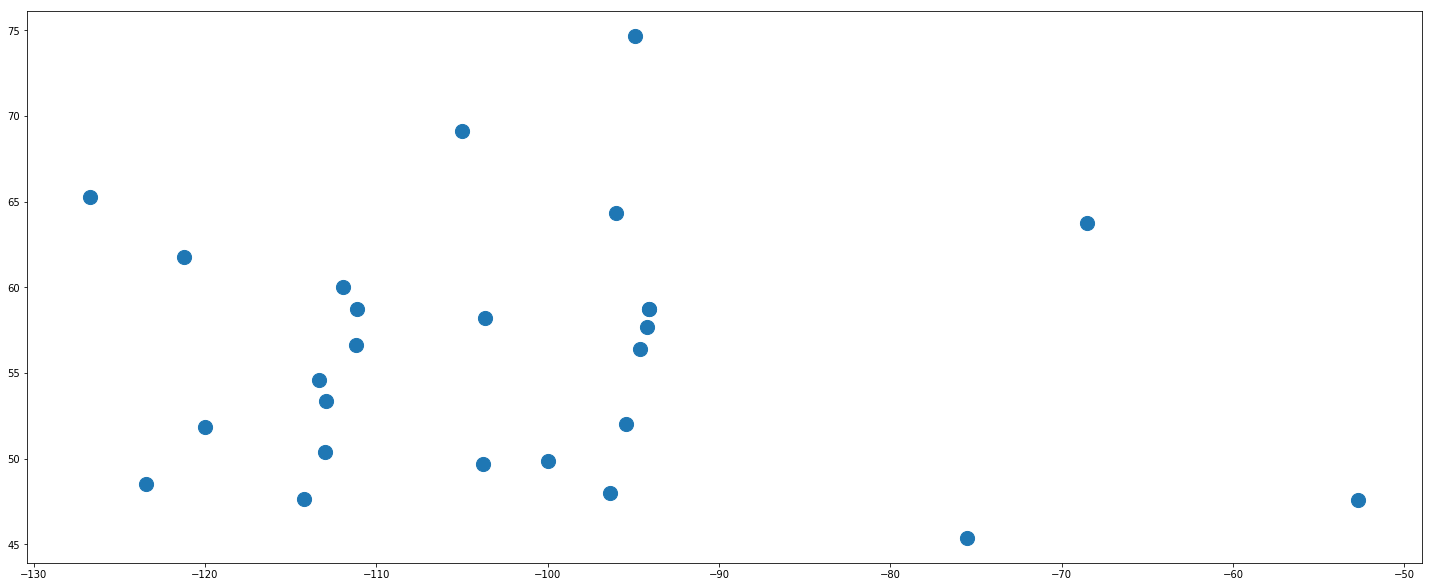

In [316]:
siteData= pd.read_csv("./siteID.csv")
siteData.columns = ['siteID','Lon', 'Lat']

import geopandas as gpd
from shapely.geometry import Point
import shapely

# Converting the dataframe into geo datarame
gdf = gpd.GeoDataFrame(siteData.iloc[:,1:].drop(['Lon', 'Lat'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(siteData.Lon, siteData.Lat)]) 

ax = gdf.plot(figsize=(25,25),markersize=200)

In [356]:
siteData

,siteID,Lon,Lat
0,BACK\t,-94.21,57.71
1,FCHP,-111.11,58.77
2,FCHU,-94.08,58.76
3,FSIM,-121.23,61.76
4,FSMI,-111.95,60.02
5,GILL,-94.64,56.38
6,LGRR,-95.46,52.04
7,MCMU,-111.21,56.66
8,MSTK,-112.97,53.35
9,NORM,-126.69,65.26
